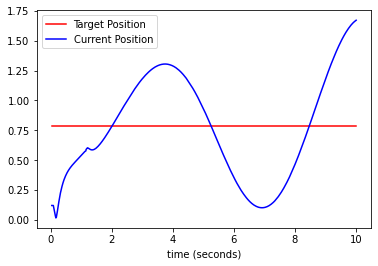

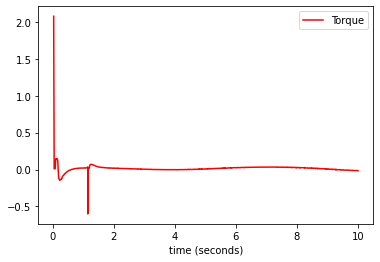

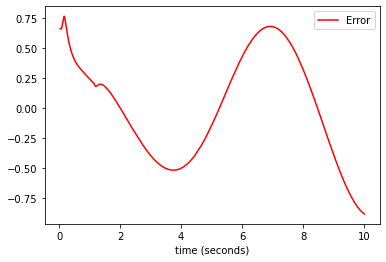

In [4]:
import sys
sys.path.append("../../")
import math

from lib.data.dataplot import *
from lib.dds.dds import *
from lib.system.controllers import *
from lib.utils.time import *

dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("target", "Target Position")
dp.add_y("current", "Current Position")

fp = DataPlotter()
fp.set_x("time (seconds)")
fp.add_y("torque", "Torque")

ep = DataPlotter()
ep.set_x("time (seconds)")
ep.add_y("error", "Error")

dds = DDS()
dds.start()
dds.subscribe(['angle'])

target_position = math.radians(45)
ctrl = PID_Controller(0.01, 0.1, 0.1)

t = Time()
t.start()

while t.get() < 10:
    
    current_position = dds.wait('angle')
    delta_t = t.elapsed()
    
    error = target_position - current_position
    torque = ctrl.evaluate(delta_t, error)

    dds.publish('torque', torque, DDS.DDS_TYPE_FLOAT)
    
    dp.append_x(t.get())
    dp.append_y("target", target_position)
    dp.append_y("current", current_position)
    
    fp.append_x(t.get())
    fp.append_y("torque", torque)

    ep.append_x(t.get())
    ep.append_y("error", error)

dds.publish('torque', 0.0, DDS.DDS_TYPE_FLOAT)

dp.plot()
fp.plot()
ep.plot()
